## Preperations

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
sns.set_theme(context='paper', style="whitegrid", color_codes=True)

plt.rcParams["axes.titlesize"] = 13 # default: 9
plt.rcParams["axes.labelsize"] = 13 # default: 9
plt.rcParams["legend.fontsize"] = 11 # default: 8.8
plt.rcParams["legend.title_fontsize"] = 11 # default: 8.8
plt.rcParams["xtick.labelsize"] = 11 # default: 8.8
plt.rcParams["ytick.labelsize"] = 11 # default: 8.8
plt.rcParams["text.usetex"] = True

In [3]:
x_col = r'$x\ [\mathrm{mm}]$'
x_err_col = r'$\Delta x\ [\mathrm{mm}]$'
n_col = r'$n\ [1]$'
n_err_col = r'$\Delta n\ [1]$'
r_col = r'$r\ [\mathrm{Hz}]$' 
r_err_col = r'$\Delta r\ [\mathrm{Hz}]$' 

## Read & calc data

In [4]:
data = pd.read_csv('Ortsaufloesung.csv', sep='\t')
data = data.rename(
    columns={
        'Position': x_col,
        'Count': n_col
    }
)

In [5]:
data[x_err_col] = 2
data[n_err_col] = data[n_col].pow(1/2)
data = data[[x_col, x_err_col, n_col, n_err_col]]

In [6]:
measured_time = 60 # seconds

data[r_col] = data[n_col] / measured_time
data[r_err_col] = data[n_err_col] / measured_time

Inhalt der $\LaTeX$-Tabelle

In [7]:
print(f"		{x_col} & {n_col} & {r_col} \\\\")
print(f"		\\hline")
for idx, row in data.iterrows():
    x = f"${int(row[x_col])} \\pm {int(row[x_err_col])}$"
    n = f"${int(row[n_col])} \\pm {int(row[n_err_col].round())}$"
    r = f"${row[r_col].round(2)} \\pm {row[r_err_col].round(2)}$"
    print(f"		{x} & {n} & {r} \\\\")

		$x\ [\mathrm{mm}]$ & $n\ [1]$ & $r\ [\mathrm{Hz}]$ \\
		\hline
		$-30 \pm 2$ & $112 \pm 11$ & $1.87 \pm 0.18$ \\
		$-20 \pm 2$ & $159 \pm 13$ & $2.65 \pm 0.21$ \\
		$-15 \pm 2$ & $229 \pm 15$ & $3.82 \pm 0.25$ \\
		$-8 \pm 2$ & $405 \pm 20$ & $6.75 \pm 0.34$ \\
		$-7 \pm 2$ & $414 \pm 20$ & $6.9 \pm 0.34$ \\
		$-6 \pm 2$ & $511 \pm 23$ & $8.52 \pm 0.38$ \\
		$-5 \pm 2$ & $486 \pm 22$ & $8.1 \pm 0.37$ \\
		$-4 \pm 2$ & $477 \pm 22$ & $7.95 \pm 0.36$ \\
		$-3 \pm 2$ & $493 \pm 22$ & $8.22 \pm 0.37$ \\
		$-2 \pm 2$ & $938 \pm 31$ & $15.63 \pm 0.51$ \\
		$-1 \pm 2$ & $1650 \pm 41$ & $27.5 \pm 0.68$ \\
		$0 \pm 2$ & $2971 \pm 55$ & $49.52 \pm 0.91$ \\
		$1 \pm 2$ & $2202 \pm 47$ & $36.7 \pm 0.78$ \\
		$2 \pm 2$ & $1616 \pm 40$ & $26.93 \pm 0.67$ \\
		$3 \pm 2$ & $686 \pm 26$ & $11.43 \pm 0.44$ \\
		$4 \pm 2$ & $512 \pm 23$ & $8.53 \pm 0.38$ \\
		$5 \pm 2$ & $538 \pm 23$ & $8.97 \pm 0.39$ \\
		$6 \pm 2$ & $498 \pm 22$ & $8.3 \pm 0.37$ \\
		$7 \pm 2$ & $467 \pm 22$ & $7.78 \pm 0.36$ \\
		$8

Text(0, 0.5, 'Zählrate $r\\ [\\mathrm{Hz}]$')

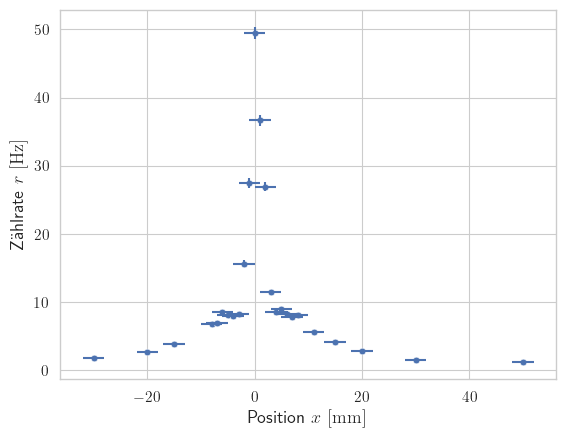

In [8]:
ax = sns.scatterplot(data, x=x_col, y=r_col)
sns.mpl.pyplot.errorbar(x=data[x_col], y=data[r_col], xerr=data[x_err_col], yerr=data[r_err_col], linewidth=0, elinewidth=1.5)
plt.xlabel(f"Position {x_col}")
plt.ylabel(f"Zählrate {r_col}")

## Fitting

Die Kurve zum Fitten kriegt einen Faktor $\alpha$, um die Fläche unter der Kurve anzupassen.

In [9]:
def gaussian(x, mu, sigma, factor):
    nominator = (x-mu)**2
    denominator = 2 * sigma**2
    return factor * np.exp(-nominator/denominator)

### Test
Teste implementierte Methode & fitting

Dokumentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

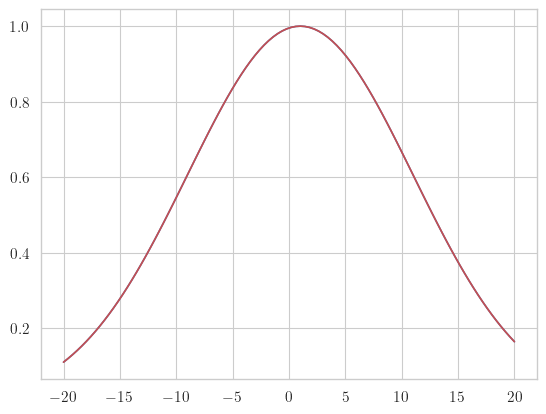

In [10]:
xdata = np.linspace(-20, 20, 100)
ydata = gaussian(xdata, 1, 10, factor=1)

popt, pcov = curve_fit(gaussian, xdata, ydata)
# popt: resulting options from fit
# pcov: estimated approximate covariance of popt

plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, gaussian(xdata, *popt), 'r-');

### Fit

In [11]:
xdata = data[x_col].values
ydata = data[r_col].values

x_range = np.linspace(xdata.min(), xdata.max(), 200)

In [12]:
popt, pcov = curve_fit(gaussian, xdata, ydata)
mu = popt[0].round(2)
sigma = popt[1].round(2)
factor = int(popt[2].round(-1))

plot

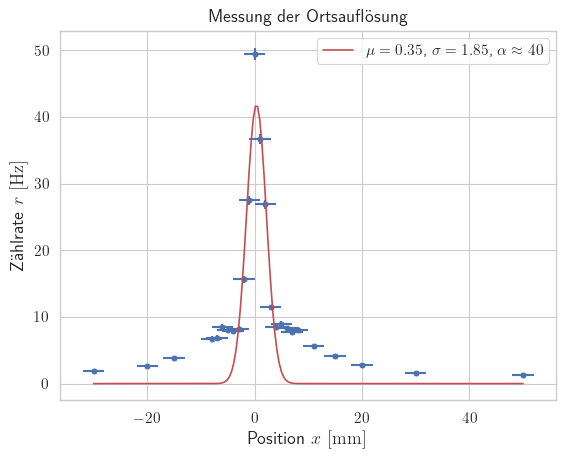

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(data, x=x_col, y=r_col, ax=ax)
plt.errorbar(x=data[x_col], y=data[r_col], xerr=data[x_err_col], yerr=data[r_err_col], linewidth=0, elinewidth=1.5)
plt.xlabel(f"Position {x_col}")
plt.ylabel(f"Zählrate {r_col}")
plt.title("Messung der Ortsauflösung")

plt.plot(x_range, gaussian(x_range, *popt), 'r-', label=f'$\\mu={mu}$, $\\sigma={sigma}$, $\\alpha\\approx{factor}$');
plt.legend();

In [14]:
fig.figure.savefig("../../media/B3.4/Ortsaufloesung_fit.svg")
fig.figure.savefig("../../media/B3.4/Ortsaufloesung_fit.png");